<a href="https://colab.research.google.com/github/mdnawabali/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_taxi_trip_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : NYC taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City**


# **BUSINESS CONTEXT**
Task is to build a model that predicts the total ride duration of taxi trips in New York City. Primary dataset is the one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

The primary goal of this project is to build a fundamental machine learning model that can forecast the typical trip time and cost for a given pickup location, dropoff location, date, and time. In order to gain an advantage over competitors and give customers greater value, every company today must effectively use its data. Making critical business decisions now often involves using machine learning, and libraries like data prep and sklearn make it possible for anyone, regardless of coding proficiency or domain expertise, to create models. One of the most potent libraries for machine learning is called Scikit Learn.

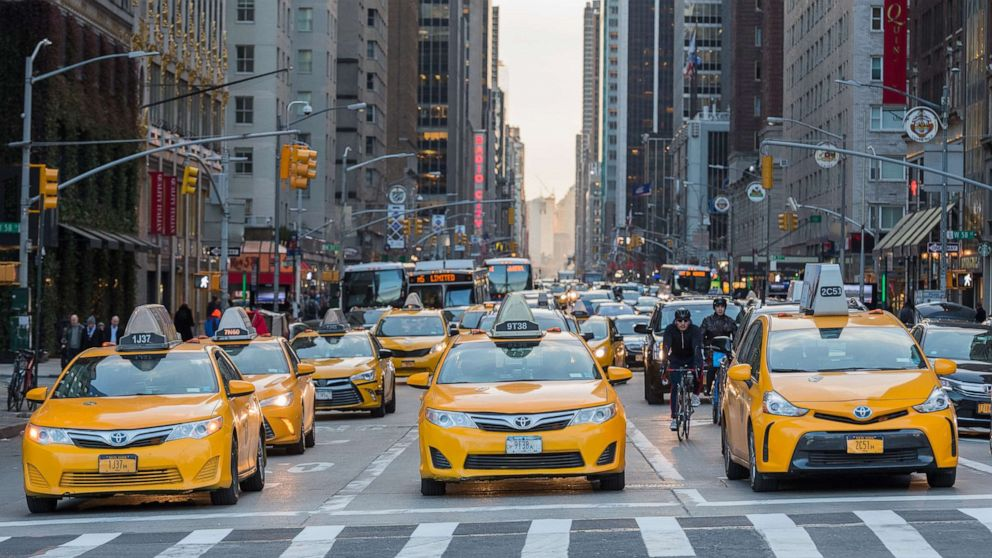

## **Understanding Dataset**
Importing necessary libraries and mounting drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from datetime import datetime
import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# lets take a look at the data set
taxi_df=pd.read_csv('/content/drive/MyDrive/capstone project 2/Copy of NYC Taxi Data.csv')
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# **Column Details**


*   **Id**: A unique identifier for each trip
*   **Vendor Id**: A unique identifier for each trip

*   **Pickup Datetime**: A unique identifier for each trip
*   **Dropoff Datetime**: A unique identifier for each trip

*   **Passenger Count**: The number of passengers in the vehicle (driver entered value)
*   **Pickup Longitude**: The number of passengers in the vehicle (driver entered value)

*   **Pickup Latitude**: The latitude where the meter was engaged
*   **Dropoff Longitude**: The longitude where the meter was disengaged

*   **Dropoff Latitude**: The latitude where the meter was disengaged

*   **Store and Fwd Flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
*   **Trip Duration**: Duration of time in seconds
















## **Preprocessing Of The Data**

In [ ]:
# Determining shape of the dataset
rows=taxi_df.shape[0]
columns=taxi_df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 1458644
Number of columns in dataset are 11


In [ ]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
# Numeric features decription
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Checking for presence of null values and also determing data types of the data present.

In [ ]:
# Defining function to determine null values in dataset and datatype of the data
def brief():
  values=pd.DataFrame(index=taxi_df.columns)
  values['Null Count']= taxi_df.isnull().sum()
  values['Dtype']=taxi_df.dtypes
  return values 

In [ ]:
brief()

,Null Count,Dtype
id,0,object
vendor_id,0,int64
pickup_datetime,0,object
dropoff_datetime,0,object
passenger_count,0,int64
pickup_longitude,0,float64
pickup_latitude,0,float64
dropoff_longitude,0,float64
dropoff_latitude,0,float64
store_and_fwd_flag,0,object


### As we can see that we do not have any null values in the dataset, therefore we can move forward with the dataset...

## In the given dataset pickup_datetime and dropoff_datetime are not in proper  date time format and we need to convert them into datetime format.

We can see that in order to fully comprehend the problem statement's real-world scenario, we will need more data from our data. For example, it is impossible for us to track the preferences and patterns of taxi service users, such as the average amount of time and day of the week that they use the service.
We lack information about taxi journeys broken down by month.
We also lack information broken down by week and day of week.

Additionally, we lack information that would allow us to determine the peak times of day when cab services are most in demand.
The distance between the locations of the taxi journeys' pickup and drop-off are likewise unavailable.

In [ ]:
# Converting timestamp to datetime format
taxi_df['pickup_datetime']=pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime']=pd.to_datetime(taxi_df['dropoff_datetime'])
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Creating pickup and dropoff months
taxi_df['pickup_month'] = taxi_df['pickup_datetime'].dt.month
taxi_df['dropoff_month'] = taxi_df['dropoff_datetime'].dt.month

In [ ]:
# Creating pickup and dropoff weekdays
taxi_df['pickup_weekday'] = taxi_df['pickup_datetime'].dt.weekday
taxi_df['dropoff_weekday'] = taxi_df['dropoff_datetime'].dt.weekday

In [ ]:
# Creating pickup and dropoff hours
taxi_df['pickup_hour'] = taxi_df['pickup_datetime'].dt.hour
taxi_df['dropoff_hour'] = taxi_df['dropoff_datetime'].dt.hour

In [ ]:
# Creating pickup and dropoff minutes
taxi_df['pickup_minute'] = taxi_df['pickup_datetime'].dt.minute
taxi_df['dropoff_minute'] = taxi_df['dropoff_datetime'].dt.minute

In [ ]:
# Creating pickup and dropoff day
taxi_df['pickup_day'] = taxi_df['pickup_datetime'].dt.day
taxi_df['dropoff_day'] = taxi_df['dropoff_datetime'].dt.day

# **Feature Engineering**

## Creating new columns distance and speed for further analysis

In [ ]:
# Creating the function for calculating distance between pickup and dropoff
from geopy.distance import geodesic
def distance_cal(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
  return geodesic(start_coordinates,stop_coordinates).km

In [ ]:
# Applying the function to our dataset and creating the feature ‘distance’.
taxi_df['distance'] = taxi_df.apply(lambda x: distance_cal(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [ ]:
 # Converting trip duration into hours
taxi_df['trip_duration_hour']=taxi_df['trip_duration']/3600

In [ ]:
# Creating speed column (km/hr)
taxi_df['Speed']= (taxi_df.distance/(taxi_df.trip_duration/3600))

## Lets take view of our data with new columns.

## **DATA VISUALIZATION**

In [ ]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_weekday,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,pickup_day,dropoff_day,distance,trip_duration_hour,Speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,17,17,24,32,14,14,1.502172,0.126389,11.885316
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,0,0,43,54,12,12,1.808660,0.184167,9.820778
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,11,12,35,10,19,19,6.379687,0.590000,10.813029
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,19,19,32,39,6,6,1.483632,0.119167,12.450063
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,13,13,30,38,26,26,1.187038,0.120833,9.823760


## Lets explore different features/variables of our dataset

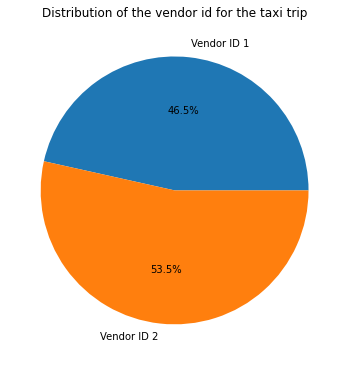

In [ ]:
# Distribution of the vendor id for the taxi trip
(taxi_df['vendor_id'].value_counts() / taxi_df['vendor_id'].count()) * 100

# Percentage For Vendor_id Column
v1_pctg = abs(len(taxi_df[taxi_df['vendor_id'] == 1])/len(taxi_df)*100)
v2_pctg = abs(len(taxi_df[taxi_df['vendor_id'] == 2])/len(taxi_df)*100)
total_pctg = [v1_pctg, v2_pctg]

# Creating a pie chart
plt.figure(figsize = (6,8))
plt.pie(total_pctg, labels = ['Vendor ID 1','Vendor ID 2'], autopct = '%.1f%%')
plt.title('Distribution of the vendor id for the taxi trip')
plt.show()

## Inference - We can observe that vendor 2 has a higher number of bookings (54%).

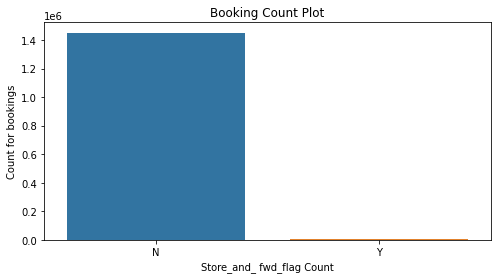

In [ ]:
# Each store_and_ fwd_flag Count
taxi_df['store_and_fwd_flag'].value_counts()
plt.figure(figsize = (8, 4))
sns.countplot(taxi_df['store_and_fwd_flag'])
plt.title('Booking Count Plot')
plt.xlabel('Store_and_ fwd_flag Count')
plt.ylabel('Count for bookings')
plt.show()

## Inference - This demonstrates that when the store and fwd flag is marked, there is a very low count of 'yes' and the majority of the time the taxi driver hasn't logged onto the vendor's systems.

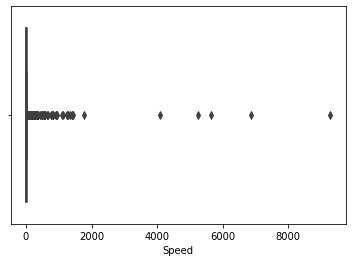

In [ ]:
# Speed outliers check
sns.boxplot(taxi_df['Speed'])

### Inference- Maximum speed limosine can sustain in the city like newyork given that roads are empty i.e its late night or early morning is arround 150kmph

*  ### Still there is speed reading in Thousands (absurd), there is clearly some error or bug in apps calculaion, as its out of mechanical abilities of vehicle 
*  ### We will limit the data set to 80 kmph (given that NYC is a Busy town) and 5 kmph, as entries out side of this limit will not contribute in ML model much rather make it less accurate

In [ ]:
# limiting speed data
taxi_df = taxi_df[taxi_df['Speed']<=80]
taxi_df = taxi_df[taxi_df['Speed']>=5]

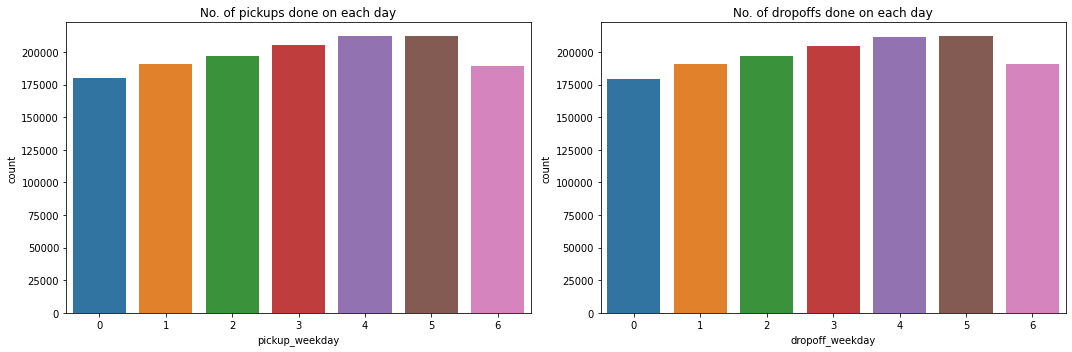

In [ ]:
# Distribution of pickups and dropoffs on daily basis
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x='pickup_weekday', data = taxi_df, ax=ax[0])
ax[0].set_title('No. of pickups done on each day')

sns.countplot(x='dropoff_weekday', data = taxi_df, ax=ax[1])
ax[1].set_title('No. of dropoffs done on each day')

plt.tight_layout()

## Inference - Above plots interpret that in a week, "friday", and "saturday" have higher number of pickups and dropoffs.
## We can see that compared to other days, taxi booking rates are higher on the weekends (4- Friday and 5-Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personnel work.

In [ ]:
# Value count for each Month for pickup and dropoff
print('Pickup Month value counts')
taxi_df['pickup_month'].value_counts().sort_index()

print('Dropoff Month value counts')
taxi_df['dropoff_month'].value_counts().sort_index()

Pickup Month value counts
Dropoff Month value counts


1    219839
2    227954
3    244963
4    239083
5    234866
6    220415
7       113
Name: dropoff_month, dtype: int64

### We will subtract starting day from ending day and divide total datetime and convert the time difference into months

In [ ]:
# Pickup data
total_pickup_datetime = taxi_df['pickup_datetime'].max() - taxi_df['pickup_datetime'].min()
total_pickup_datetime = total_pickup_datetime / np.timedelta64(1, 'M')
print('Total pickup datetime:',round(total_pickup_datetime,1))

# Dropoff data
total_dropoff_datetime = taxi_df['dropoff_datetime'].max() - taxi_df['dropoff_datetime'].min()
total_dropoff_datetime = total_dropoff_datetime / np.timedelta64(1, 'M')
print('Total dropoff datetime:',round(total_dropoff_datetime,1))

Total pickup datetime: 6.0
Total dropoff datetime: 6.0


## We can see that the entire amount of data is close to six months, which explains why our month values only include six months.

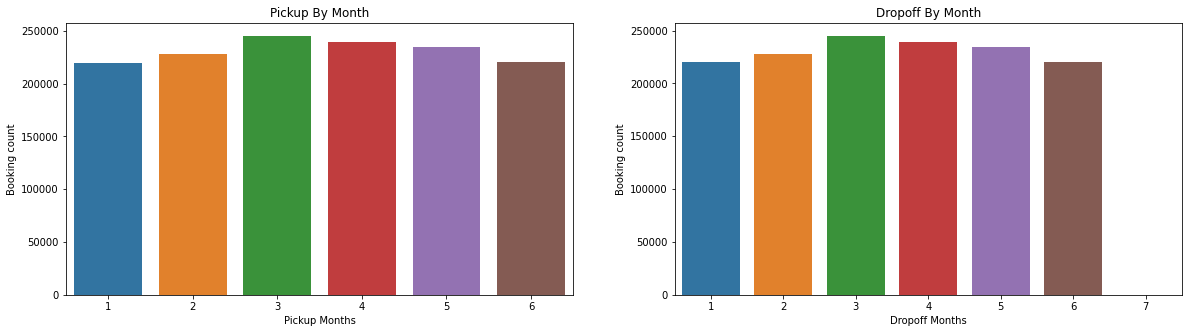

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
# Pickup by month count
ax1.set_title('Pickup By Month')
ax = sns.countplot(x = 'pickup_month', data = taxi_df, ax = ax1)
ax.set_xlabel('Pickup Months')
ax.set_ylabel('Booking count')

# Droppoff by month count 
ax = sns.countplot(taxi_df['dropoff_month'],ax = ax2)
ax2.set_title('Dropoff By Month')
ax.set_xlabel('Dropoff Months')
ax.set_ylabel('Booking count')
plt.show()

## Inference - As we can see, more taxi reservations occurred in the months of March and April.

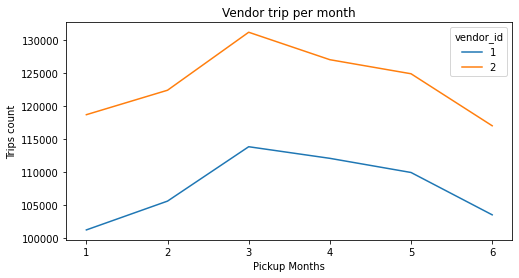

In [ ]:
# Monthly trend for each vendor
monthly_pickup_vendor = taxi_df.groupby(['pickup_month', 'vendor_id']).size()
monthly_pickup_vendor = monthly_pickup_vendor.unstack()

monthly_pickup_vendor.plot(kind = 'line', figsize = (8,4))
plt.title('Vendor trip per month')
plt.xlabel('Pickup Months')
plt.ylabel('Trips count')

plt.show()

## Inference - We can see that both vendors' trips are at their maximum in the month of March and their lowest in  the month of January, February, and after June.

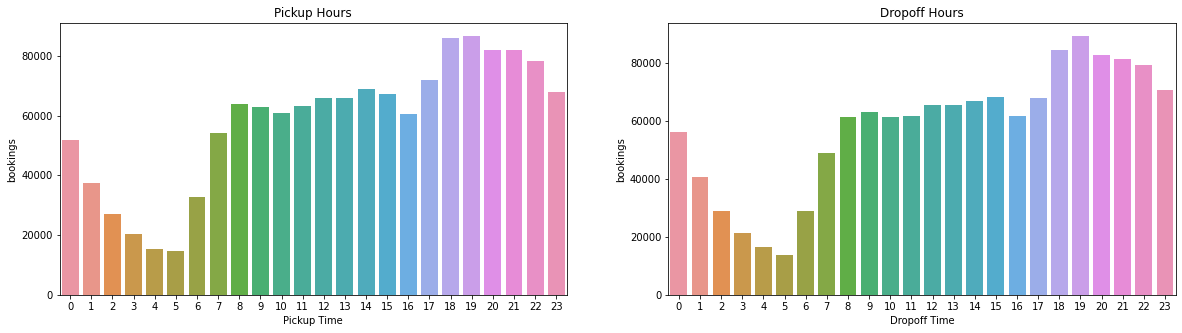

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
# Pickup data
ax1.set_title('Pickup Hours')
ax = sns.countplot(x = 'pickup_hour', data = taxi_df, ax = ax1)
ax.set_xlabel('Pickup Time')
ax.set_ylabel('bookings')

# Dropoff data
ax = sns.countplot(taxi_df['dropoff_hour'],ax = ax2)
ax2.set_title('Dropoff Hours')
ax.set_xlabel('Dropoff Time')
ax.set_ylabel('bookings')

plt.show()

### Inference - Distribution of pickup and dropoff hours follows same pattern, it shows that most of the pickups and dropoffs are in the evening( x axis represesnts time in hrs, and peak is >15hr). We can see that people often use taxi services to get to their workplaces in the mornings after 10:00. Additionally, the demand for taxis tends to surge in the late evening after six o'clock.

Text(0.5, 1.0, 'Distribution of passenger count')

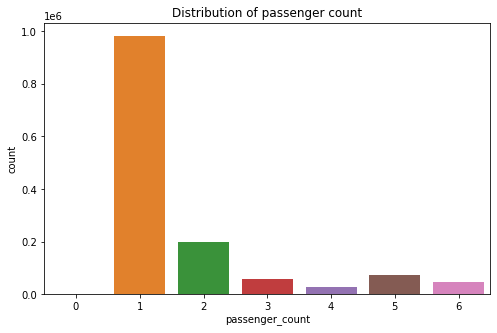

In [ ]:
# Distribution of passenger count
plt.figure(figsize=(8,5))
ax=sns.countplot(x=taxi_df['passenger_count'])
plt.title('Distribution of passenger count')

## Inference - We can notice that most of the bookings are made by solo travelers, which means less number of people prefer car pool or amy be less number of groups book car...people prefer to ride solo

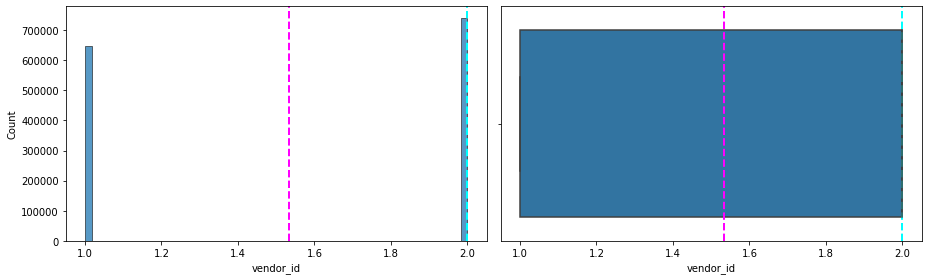

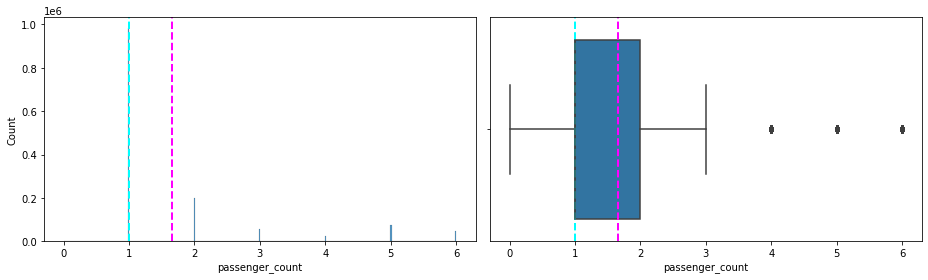

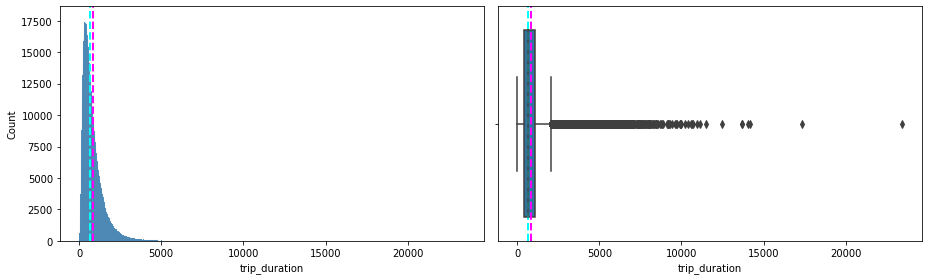

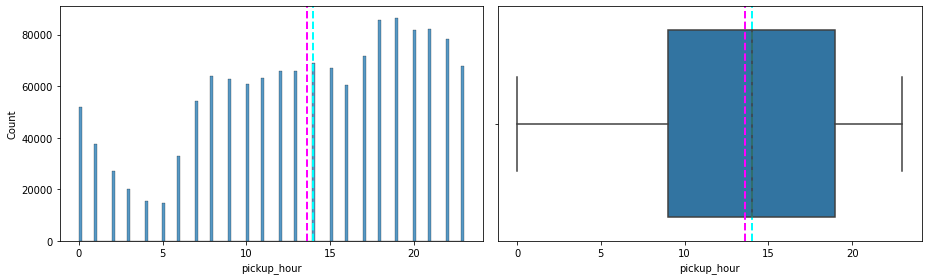

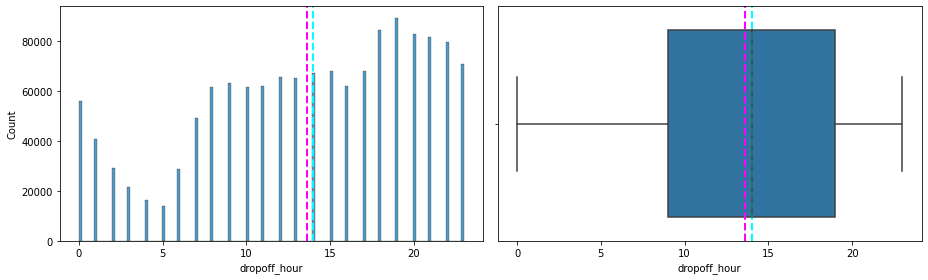

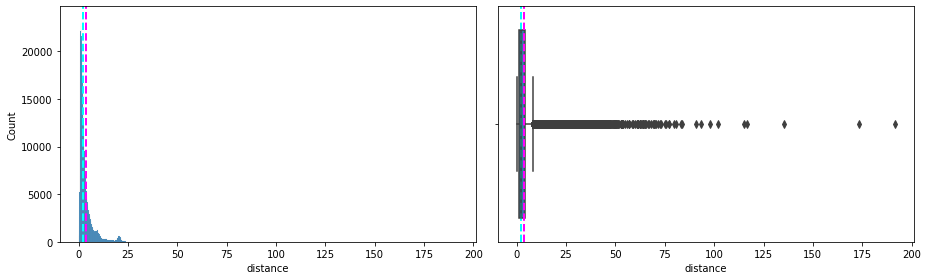

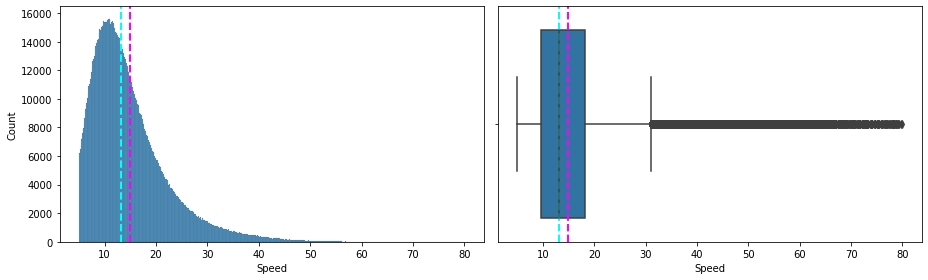

In [ ]:
numeric_features = ['vendor_id', 'passenger_count', 'trip_duration', 'pickup_hour', 'dropoff_hour','distance', 'Speed']
numeric_features

for col in numeric_features:
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,4))
  sns.histplot(data=taxi_df, x=col, ax=ax[0])
  ax[0].axvline(taxi_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[0].axvline(taxi_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  sns.boxplot(data=taxi_df, x=col, ax=ax[1])
  ax[1].axvline(taxi_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax[1].axvline(taxi_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.tight_layout()

# Inference - 

 *  ## (histplot) distance, speed and trip_duration graphs are highly skewed.
 *  ## (boxplot) distance, speed and trip_duration columns have a lot outliers as well




## **Checking skewness of the dependent variable**

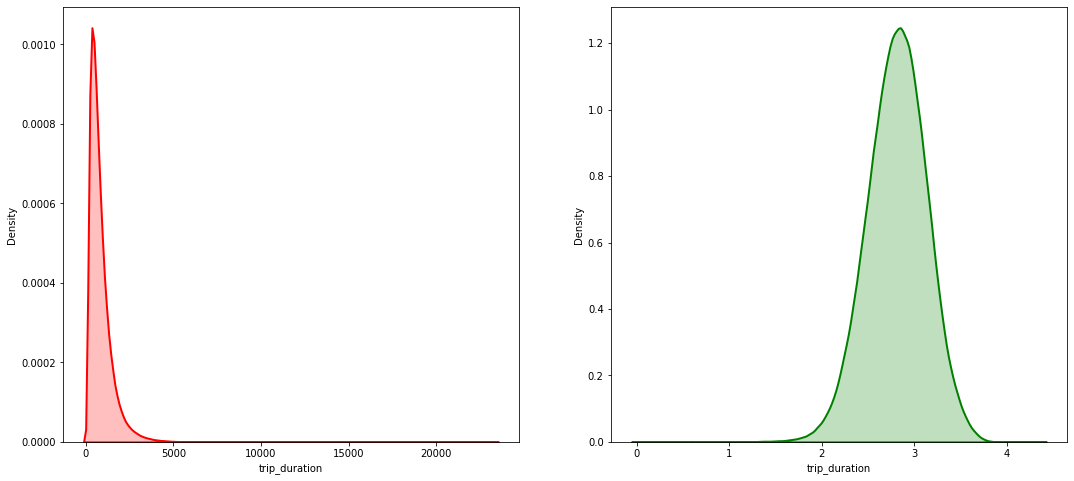

In [ ]:
fig,ax=plt.subplots(1,2, figsize=(18,8))
sns.distplot(taxi_df.trip_duration, hist= False, kde= True, kde_kws= {'shade':True, 'linewidth':2}, label= 'non_normal', color='red', ax=ax[0])
sns.distplot(np.log10(taxi_df['trip_duration']), hist= False, kde= True, kde_kws={'shade':True, 'linewidth':2}, label='normal', color='green',ax=ax[1])

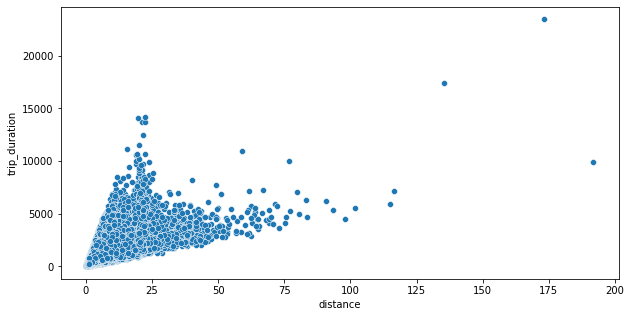

In [ ]:
fig = plt.figure(figsize=(10, 5))
sns.scatterplot(x='distance',y='trip_duration',data=taxi_df)

## **Determining correlation between independent variables**

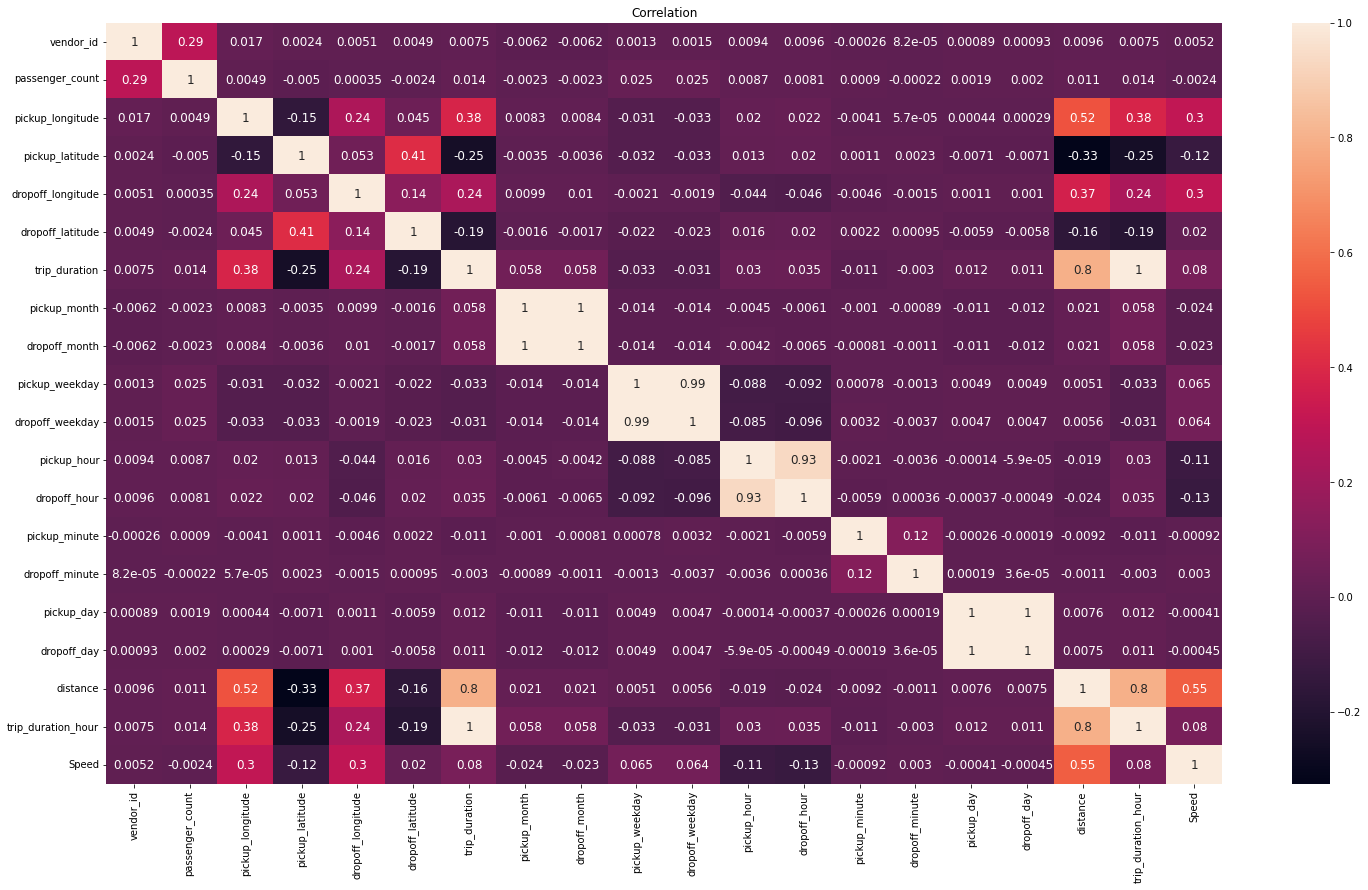

In [ ]:
# Determining Correlation
plt.figure(figsize=(25,14))
correlation = taxi_df.corr()
sns.heatmap(correlation, annot=True, annot_kws={"size":12})
plt.title("Correlation")
plt.show()

## Inference - Above heatmap clearly shows that  'dropoff_day', 'pickup_day','pickup_hour', 'dropoff_hour', 'pickup_month', 'dropoff_month', 'pickup_weekday', 'dropoff_weekday' are highly correlated.

In [ ]:
# This function returns highly correlated columns w.r.t given threshold
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# Calling the finction with threshold value 0.90

high_corr_features = correlation(taxi_df, 0.90)
print('Number of correlated features :',len(set(high_corr_features))) # getting the number of correlated features

Number of correlated features : 5


In [ ]:
high_corr_features

{'dropoff_day',
 'dropoff_hour',
 'dropoff_month',
 'dropoff_weekday',
 'trip_duration_hour'}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 10.2 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


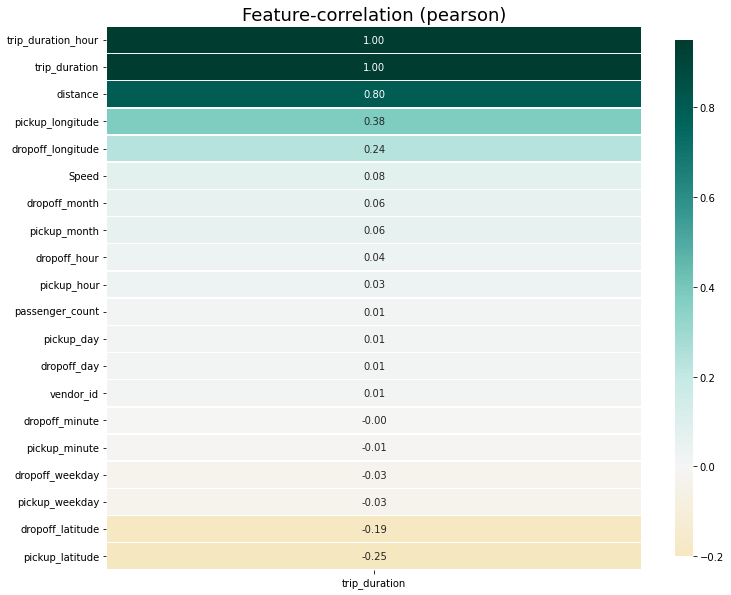

In [ ]:
#correlation graph dependent and independent features
! pip install klib 
import klib
klib.corr_plot(taxi_df, target=taxi_df['trip_duration'])

## Inference - Graph is positivley skewed so it needs to be regularized... we used log transformation to convert this into normal distribution

# **Outlier Removal** 
### Interquartile range measures the spread of the middle half of our data.
### Formula: Q3 - Q1
### where Q1- quartile 1 and Q3- quartile 3

### lower limit of the data is given by Q1-1.5*IQR
### upper limit of the data is given by Q3+1.5*IQR

### **We will be using percentile method to detect and remove outliers from the data**

In [ ]:
# Assigning different quarters to distance column
distance_Q1=np.percentile(taxi_df['distance'], 25)
print(distance_Q1)
distance_Q2=np.percentile(taxi_df['distance'], 50)
print(distance_Q2)
distance_Q3=np.percentile(taxi_df['distance'], 75)
print(distance_Q3)

1.3053627080304464
2.1886403670534387
4.026140514914051


In [ ]:
# Calculating IQR
IQR= distance_Q3 - distance_Q1
distance_lower_limit=distance_Q1 - 1.5*IQR
distance_upper_limit=distance_Q3 + 1.5*IQR
print("distance_lower_limit:", distance_lower_limit)
print("distance_upper_limit:", distance_upper_limit)

distance_lower_limit: -2.7758040022949606
distance_upper_limit: 8.107307225239458


In [ ]:
# Removing outliers
taxi_df=taxi_df[taxi_df['distance']>0]
taxi_df=taxi_df[taxi_df['distance']<distance_upper_limit]

In [ ]:
# new shape of the dataset
taxi_df.shape

(1252980, 24)

In [ ]:
# Assigning different quarters to Speed  column
Speed_Q1=np.percentile(taxi_df['Speed'], 25)
print(Speed_Q1)
Speed_Q2=np.percentile(taxi_df['Speed'], 50)
print(Speed_Q2)
Speed_Q3=np.percentile(taxi_df['Speed'], 75)
print(Speed_Q3)

9.33734806229699
12.52478339698875
16.788437359611187


In [ ]:
# Calculating IQR
IQR= Speed_Q3 - Speed_Q1
Speed_lower_limit=Speed_Q1 - 1.5*IQR
Speed_upper_limit=Speed_Q3 + 1.5*IQR
print("distance_lower_limit:", Speed_lower_limit)
print("distance_upper_limit:", Speed_upper_limit)

distance_lower_limit: -1.8392858836743073
distance_upper_limit: 27.965071305582484


In [ ]:
# Removing outliers
taxi_df=taxi_df[taxi_df['Speed']>0]
taxi_df=taxi_df[taxi_df['Speed']<Speed_upper_limit]

In [ ]:
# new shape of the dataset
taxi_df.shape

(1211632, 24)

In [ ]:
# Assigning different quarters to trip duration column
trip_duration_Q1=np.percentile(taxi_df['trip_duration'], 25)
print(trip_duration_Q1)
trip_duration_Q2=np.percentile(taxi_df['trip_duration'], 50)
print(trip_duration_Q2)
trip_duration_Q3=np.percentile(taxi_df['trip_duration'], 75)
print(trip_duration_Q3)

379.0
607.0
932.0


In [ ]:
# Calculating IQR
IQR= trip_duration_Q3 - trip_duration_Q1
trip_duration_lower_limit=trip_duration_Q1 - 1.5*IQR
trip_duration_upper_limit=trip_duration_Q3 + 1.5*IQR
print("trip_duration_lower_limit:", trip_duration_lower_limit)
print("trip_duration_upper_limit:", trip_duration_upper_limit)

trip_duration_lower_limit: -450.5
trip_duration_upper_limit: 1761.5


In [ ]:
# Removing outliers
taxi_df=taxi_df[taxi_df['trip_duration']>0]
taxi_df=taxi_df[taxi_df['trip_duration']<trip_duration_upper_limit]

In [ ]:
# new shape of the dataset
taxi_df.shape

(1177249, 24)

In [ ]:
# Assigning different quarters to trip duration column
passenger_count_Q1=np.percentile(taxi_df['passenger_count'], 25)
print(passenger_count_Q1)
passenger_count_Q2=np.percentile(taxi_df['passenger_count'], 50)
print(passenger_count_Q2)
passenger_count_Q3=np.percentile(taxi_df['passenger_count'], 75)
print(passenger_count_Q3)

1.0
1.0
2.0


In [ ]:
# Calculating IQR
IQR= passenger_count_Q3 - passenger_count_Q1
passenger_count_lower_limit=passenger_count_Q1 - 1.5*IQR
passenger_count_upper_limit=passenger_count_Q3 + 1.5*IQR
print("passenger_count_lower_limit:", passenger_count_lower_limit)
print("passenger_count_upper_limit:", passenger_count_upper_limit)

passenger_count_lower_limit: -0.5
passenger_count_upper_limit: 3.5


In [ ]:
# Removing outliers
taxi_df=taxi_df[taxi_df['passenger_count']>0]
taxi_df=taxi_df[taxi_df['passenger_count']<passenger_count_upper_limit]

In [ ]:
# new shape of the dataset
taxi_df.shape

(1053004, 24)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [ ]:
calc_vif(taxi_df[[i for i in taxi_df.describe().columns if i not in ['trip_duration_hour', 'trip_duration']]])

,variables,VIF
0,vendor_id,9.944629e+00
1,passenger_count,6.684228e+00
2,pickup_longitude,1.919817e+07
3,pickup_latitude,5.825174e+06
4,dropoff_longitude,1.969379e+07
5,dropoff_latitude,5.030138e+06
6,pickup_month,1.456139e+08
7,dropoff_month,1.456353e+08
8,pickup_weekday,5.190148e+02
9,dropoff_weekday,5.196225e+02


## Inference - We know that acceptable range of VIF is <5, vendor_id has the maximum vif

## Since we have textual data in our dataset which might create problems during model prediction, therefore we need to convert this textual data into dummy variables

In [ ]:
# Converting into dummy variables
taxi_df=pd.get_dummies(taxi_df, columns=['store_and_fwd_flag', 'pickup_weekday', 'dropoff_weekday'])

In [ ]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,pickup_weekday_4,pickup_weekday_5,pickup_weekday_6,dropoff_weekday_0,dropoff_weekday_1,dropoff_weekday_2,dropoff_weekday_3,dropoff_weekday_4,dropoff_weekday_5,dropoff_weekday_6
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,...,0,0,0,1,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,...,0,0,1,0,0,0,0,0,0,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,...,0,0,0,0,0,1,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,...,0,1,0,0,0,0,0,0,1,0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,1551,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
taxi_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_month', 'dropoff_month', 'pickup_hour', 'dropoff_hour',
       'pickup_minute', 'dropoff_minute', 'pickup_day', 'dropoff_day',
       'distance', 'trip_duration_hour', 'Speed', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'pickup_weekday_0', 'pickup_weekday_1',
       'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4',
       'pickup_weekday_5', 'pickup_weekday_6', 'dropoff_weekday_0',
       'dropoff_weekday_1', 'dropoff_weekday_2', 'dropoff_weekday_3',
       'dropoff_weekday_4', 'dropoff_weekday_5', 'dropoff_weekday_6'],
      dtype='object')

## Instead of dropping irrelevant or collinear columns we will be creating a separate list containg only those variables that are important and are not collinear
### (dropoff_day', 'dropoff_hour', 'dropoff_month', 'dropoff_weekday', 'trip_duration_hour are highly correlated according to the heatmap and vendor_id has maximum vif, therefore we will not be considering these values.)

In [ ]:
features=['passenger_count', 'distance', 'pickup_longitude', 'pickup_latitude', 'pickup_hour', 'pickup_day', 'pickup_weekday_0', 'pickup_weekday_1',
       'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4',  'pickup_month', 'pickup_minute', 'dropoff_minute',
       'pickup_weekday_5', 'pickup_weekday_6',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag_N',  'store_and_fwd_flag_Y', 'Speed' ]
      

In [ ]:
final_df=taxi_df[features]

## Evaluating which model is better. Therefore we will be calculating evaluation metrics for different models

In [ ]:
from matplotlib import legend
# Defining a function to calculate evaluation metrics
def EM(x_train,y_train,y_predicted,disp="on"):
  ''' Takes different set of parameters and prints evaluation metrics '''
  MSE=round(mean_squared_error(y_true=y_train,y_pred=y_predicted),4)
  RMSE=(np.sqrt(MSE))
  R2=(r2_score(y_true=y_train,y_pred=y_predicted))
  Adjusted_R2=(1-(1-r2_score(y_train, y_predicted))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))
  if disp=="on":
    print("Mean Squared Error:",MSE,"Root Mean Squared Error:", RMSE)
    print("R2 Score :",R2,"Adjusted R2 Score :",Adjusted_R2)

  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((y_predicted)[:100]) 
  plt.plot((np.array(y_train)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')


  
  return (MSE,RMSE,R2,Adjusted_R2) 

In [ ]:
#For Standarization  apply z-score
from scipy.stats import zscore

#Train test split
x = final_df[features].apply(zscore)[:100000]
y=taxi_df['trip_duration_hour'][:100000]

# Importing train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## **LINEAR REGRESSION**

In [ ]:
# Instantiate Linear Regression objects
regression = LinearRegression()
regression.fit(x_train, y_train)
regression.score(x_train, y_train)

y_pred_train = regression.predict(x_train)

y_pred_test = regression.predict(x_test)

Mean Squared Error: 0.0013 Root Mean Squared Error: 0.03605551275463989
R2 Score : 0.8789328302394317 Adjusted R2 Score : 0.8789010413654292


(0.0013, 0.03605551275463989, 0.8789328302394317, 0.8789010413654292)

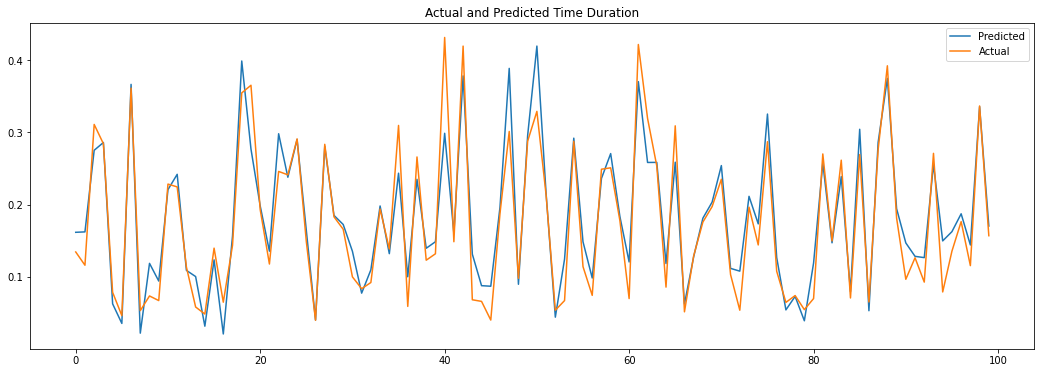

In [ ]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_train)

Mean Squared Error: 0.0013 Root Mean Squared Error: 0.03605551275463989
R2 Score : 0.877650046123937 Adjusted R2 Score : 0.8775214372025537


(0.0013, 0.03605551275463989, 0.877650046123937, 0.8775214372025537)

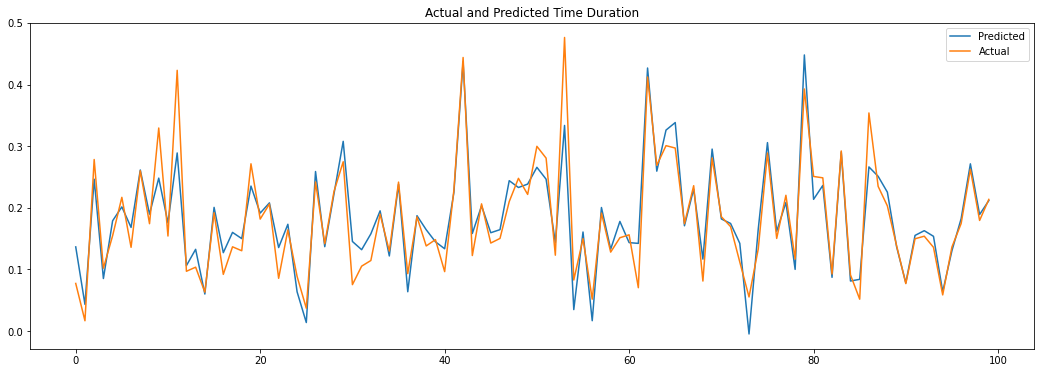

In [ ]:
#Evaluation metrics for Test set
EM(x_test,y_test,y_pred_test)

## **DECISION TREE**

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# Hyperparameter Grid
param_decision_tree = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
decision_tree_model = DecisionTreeRegressor()

# Grid search
decision_tree_grid = GridSearchCV(estimator=decision_tree_model,
                       param_grid = param_decision_tree,
                       cv = 5, verbose=2, scoring='r2')

decision_tree_grid.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.3s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [ ]:
decision_tree_grid.best_score_

0.9973514241257295

In [ ]:
decision_tree_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10)

In [ ]:
decision_tree_optimal_model =decision_tree_grid.best_estimator_

y_pred_decision_tree_test=decision_tree_optimal_model.predict(x_test)
y_pred_decision_tree_train=decision_tree_optimal_model.predict(x_train)
y_pred_decision_tree_test=decision_tree_optimal_model.predict(x_test)
y_pred_decision_tree_train=decision_tree_optimal_model.predict(x_train)

Mean Squared Error: 0.0 Root Mean Squared Error: 0.0
R2 Score : 0.9979097359508896 Adjusted R2 Score : 0.9979091871056442


(0.0, 0.0, 0.9979097359508896, 0.9979091871056442)

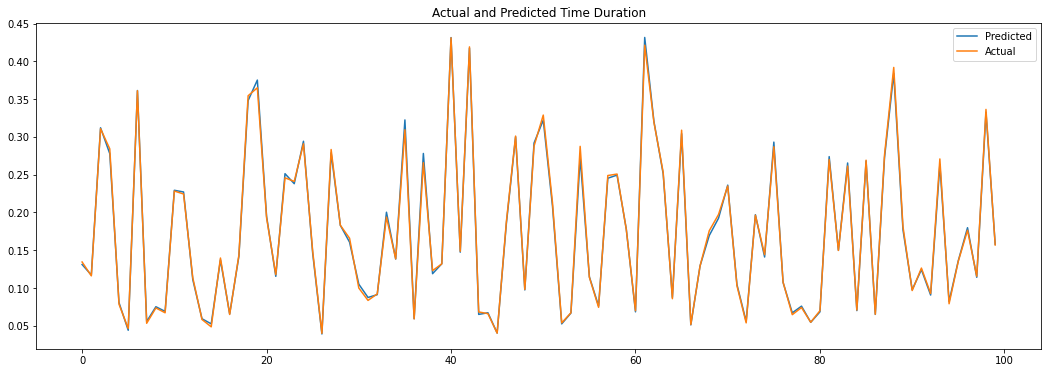

In [ ]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_decision_tree_train) 

Mean Squared Error: 0.0 Root Mean Squared Error: 0.0
R2 Score : 0.9973704394485362 Adjusted R2 Score : 0.9973676753694702


(0.0, 0.0, 0.9973704394485362, 0.9973676753694702)

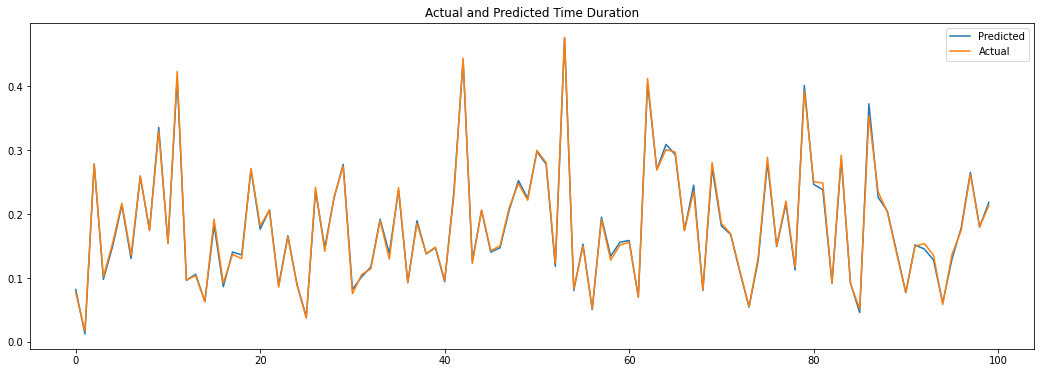

In [ ]:
#Evaluation metrics for Test set
EM(x_test,y_test,y_pred_decision_tree_test) 

## **XG BOOST**

In [ ]:
# Number of trees
total_estimators = [50,100,120]

# Maximum depth of trees
max_depth_of_trees = [5,7,9]
min_samples_split = [40,50]
#learning_rate=[0.1,0.3,0.5]

# Hyperparameter Grid
param_xgboost = {'total_estimators' : total_estimators,
              'max_depth' : max_depth_of_trees,
             'min_samples_split':min_samples_split
              }

In [ ]:
# Instantiate  XGBRegressor
import xgboost as xgb
xgboost_model = xgb.XGBRegressor()

# Grid search
xgboost_grid = GridSearchCV(estimator=xgboost_model,param_grid = param_xgboost,cv = 3, verbose=2,scoring="r2")

xgboost_grid.fit(x_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[15:01:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=  12.5s
[15:01:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=   5.1s
[15:01:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=50; total time=   5.1s
[15:01:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=5, min_samples_split=40, total_estimators=100; total time=   5.1s
[15:01:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecat

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'total_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [ ]:
xgboost_grid.best_score_

0.9998506277236864

In [ ]:
xgboost_grid.best_params_

{'max_depth': 9, 'min_samples_split': 40, 'total_estimators': 50}

In [ ]:
xgboost_optimal_model =xgboost_grid.best_estimator_

In [ ]:
y_pred_xgboost_test=xgboost_optimal_model.predict(x_test)
y_pred_xgboost_train=xgboost_optimal_model.predict(x_train)

Mean Squared Error: 0.0 Root Mean Squared Error: 0.0
R2 Score : 0.9999354318878707 Adjusted R2 Score : 0.99993542462305


(0.0, 0.0, 0.9999354318878707, 0.99993542462305)

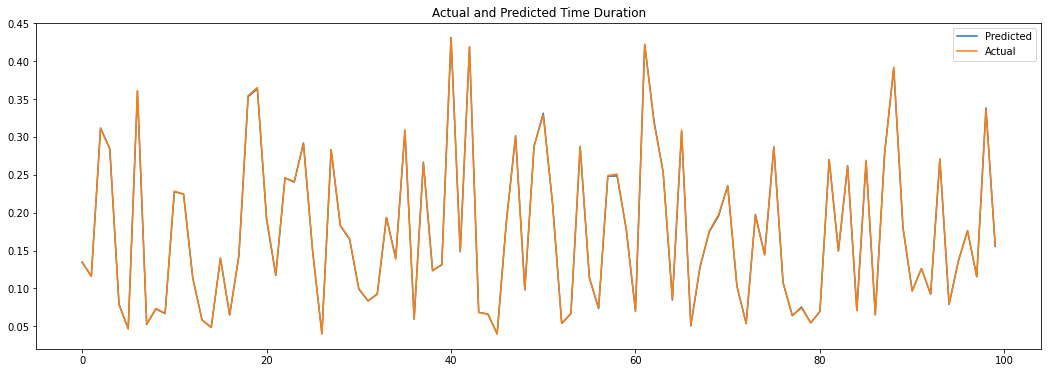

In [ ]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_xgboost_train)

Mean Squared Error: 0.0 Root Mean Squared Error: 0.0
R2 Score : 0.9998849271143303 Adjusted R2 Score : 0.9998848753056274


(0.0, 0.0, 0.9998849271143303, 0.9998848753056274)

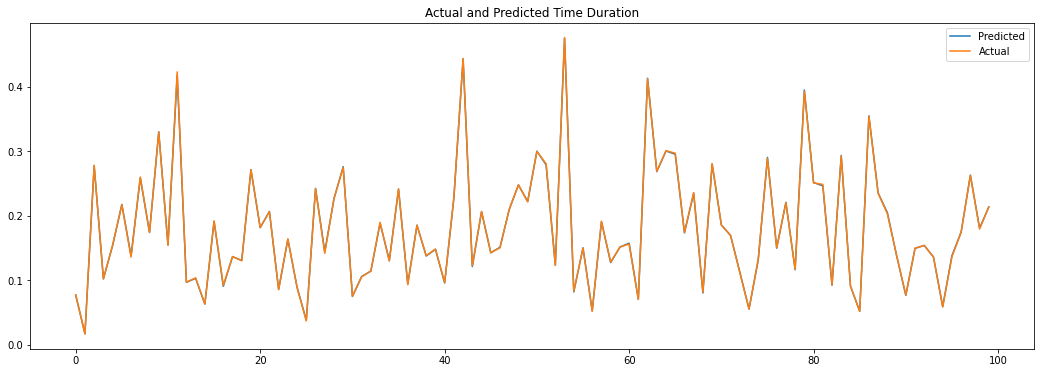

In [ ]:
# Evaluation metrics for Test set
EM(x_test,y_test,y_pred_xgboost_test) 

## **GRADIENT BOOST**

In [ ]:
# Number of trees
gradient_boost_estimators = [100]

# Maximum depth of trees
maximum_depth_gb = [5,8,10]

# Minimum number of samples required to split a node
minimum_samples_split_gb = [50,80]

# Minimum number of samples required at each leaf node
minimum_samples_leaf_gb = [40,50]

# HYperparameter Grid
param_gradient_boost = {'N_estimators' : gradient_boost_estimators,
              'maximum_depth_gb' : maximum_depth_gb,
              'minimum_samples_split_gb' : minimum_samples_split_gb,
              'minimum_samples_leaf_gb' : minimum_samples_leaf_gb}

In [ ]:
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost_model=GradientBoostingRegressor()
gradient_boost_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_preds_gradient_boost_test = gradient_boost_model.predict(x_test)
y_pred_gradient_boost_train=gradient_boost_model.predict(x_train)

Mean Squared Error: 0.0 Root Mean Squared Error: 0.0
R2 Score : 0.9972378525188468 Adjusted R2 Score : 0.9972371272556856


(0.0, 0.0, 0.9972378525188468, 0.9972371272556856)

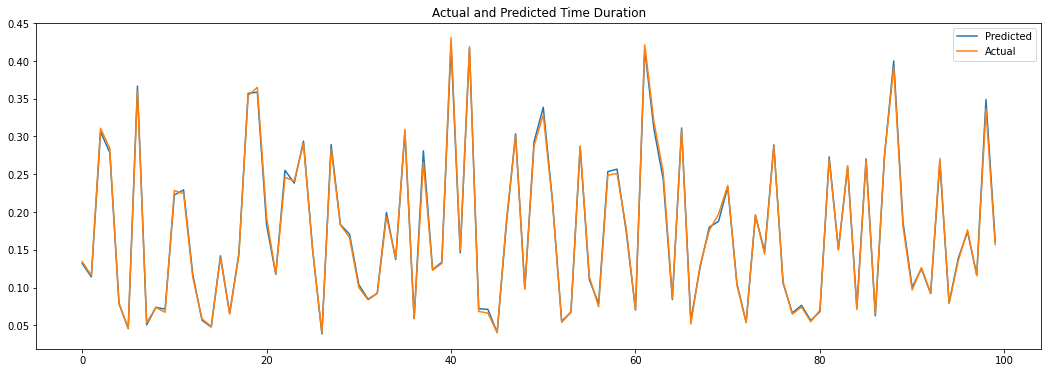

In [ ]:
#Evaluation metrics for Train set
EM(x_train,y_train,y_pred_gradient_boost_train)

Mean Squared Error: 0.0 Root Mean Squared Error: 0.0
R2 Score : 0.9970939724099199 Adjusted R2 Score : 0.9970909177207923


(0.0, 0.0, 0.9970939724099199, 0.9970909177207923)

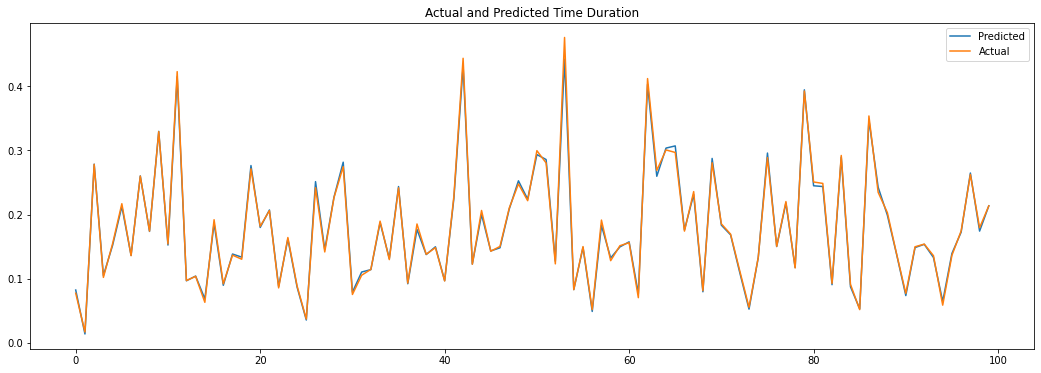

In [ ]:
#Evaluation metrics for Test set
EM(x_test,y_test,y_preds_gradient_boost_test)

### Comparing evaluation metrics of different models

In [ ]:
# initialize list of lists
data = [[0.0023, 0.04795831523312719, 0.7894172894648182, 0.7893540949033572], [0.0001, 0.01, 0.9903128194948203, 0.9903099124322117], 
        [0.0, 0.0, 0.998909240250421, 0.9989089129202054], [0.0001, 0.01, 0.9877266740289241, 0.9877229908801488]]
    
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['MSE', 'RMSE', 'R2', 'AdR2'], index=['Linear Regression', 'Decision Tree', 'XgBoost', 'Gradient Boost'])
df

,MSE,RMSE,R2,AdR2
Linear Regression,0.0023,0.047958,0.789417,0.789354
Decision Tree,0.0001,0.010000,0.990313,0.990310
XgBoost,0.0000,0.000000,0.998909,0.998909
Gradient Boost,0.0001,0.010000,0.987727,0.987723


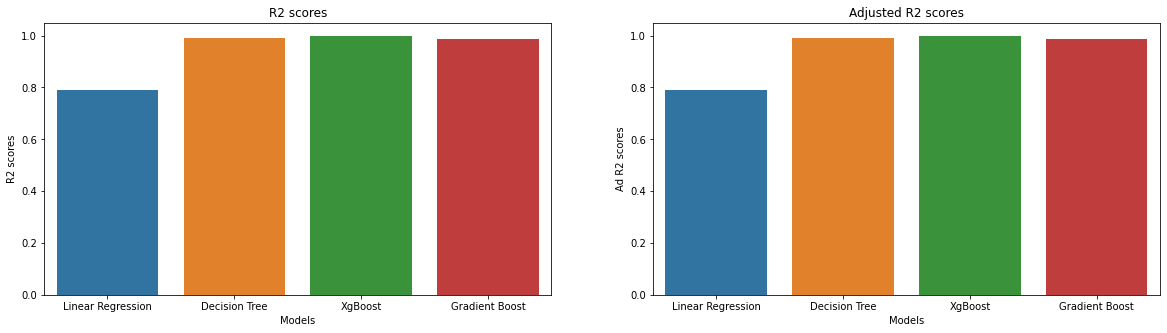

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Linear Regression', 'Decision Tree', 'XgBoost', 'Gradient Boost']
# Pickup by month count
ax1.set_title('R2 scores')
ax = sns.barplot(x = x_, y='R2', data = df, ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('R2 scores')

# Droppoff by month count 
ax = sns.barplot(x = x_, y='AdR2',  data = df, ax = ax2)
ax2.set_title('Adjusted R2 scores')
ax.set_xlabel('Models')
ax.set_ylabel('Ad R2 scores')
plt.show()

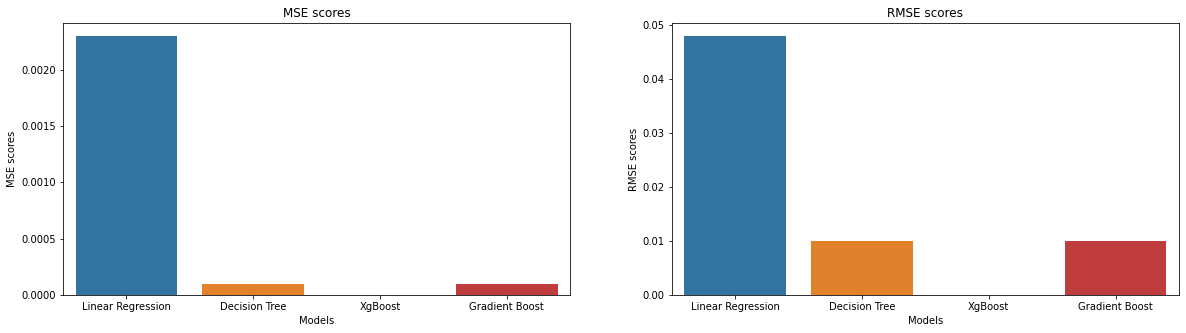

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 5))
x_= ['Linear Regression', 'Decision Tree', 'XgBoost', 'Gradient Boost']
# Pickup by month count
ax1.set_title('MSE scores')
ax = sns.barplot(x = x_, y='MSE', data = df, ax = ax1)
ax.set_xlabel('Models')
ax.set_ylabel('MSE scores')

# Droppoff by month count 
ax = sns.barplot(x = x_, y='RMSE',  data = df, ax = ax2)
ax2.set_title('RMSE scores')
ax.set_xlabel('Models')
ax.set_ylabel('RMSE scores')
plt.show()

# **Conclusion for EDA:**


*   Vendor 2 recieves more number of bookings
*   The majority of the time the taxi driver hasn't logged onto the vendor's systems.

*   We can see that compared to other days, taxi booking rates are higher on the weekends (4- Friday and 5-Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personnel work.
*   Taxi reservations were more in the month of March and April.

*  Both  vendors' trips are at their maximum in the month of March and their lowest in the month of January, February, and after June. 
*   people often use taxi services to get to their workplaces in the mornings after 10:00. Additionally, the demand for taxis tends to surge in the late evening after six o'clock.

*   most of the bookings are made by solo travelers, which means less number of people prefer car pool or amy be less number of groups book car...people prefer to ride solo








